In [1]:
import pandas as pd
from olx_scrap import OLX_Scraper
from olx_url_builder import OLX_URLBuilder
from hh_scrap import HH_Scraper
from price_converter import PriceConverter
from transport_scrap import TransportScrap
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

hh_reload = True
olx_reload = True
bus_reload = True

using autocomplete
Yakkasaray


In [2]:
transport_scraper = TransportScrap()
if bus_reload:
    raw_bus_df = transport_scraper.get_transport_data()
    raw_bus_df.to_excel("data/raw_bus.xlsx", sheet_name="bus_data", index=False)
else:
    raw_bus_df = pd.read_excel("data/raw_bus.xlsx")
display(raw_bus_df)

using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autoco

,Filial,Yonalishraqami,Yonalishnomi,Yonalishmasofasi,Ishtartibiishkuni,Ishtartibishanba,Ishtartibiyakshanba,Ortachaoraliqinterval,Avtobusrusumi,start_address,stop_address,start_district,stop_district
0,1,12,Qo‘yliq dehqon bozori - Qushbegi mavzesi,21.2,5:15-22:56,6:00-22:24,6:00-22:13,11-13,Yutong GAZ,Qo‘yliq dehqon bozori,Qushbegi mavzesi,Bektemir,Yakkasaray
1,1,15,Qo‘yliq 1-mavzesi - Do‘stlik metrosi,13.83,5:30-22:19,6:00-21:28,6:00-21:10,15,MAN,Qo‘yliq 1,mavzesi - Do‘stlik metrosi,Mirabad,None
2,1,22,Do‘stlik metrosi - Toshkent MUM,15.33,5:46-23:21,6:24-22:24,6:10-22:15,11-14,MAN,Do‘stlik metrosi,Toshkent MUM,Yashnabad,Mirabad
3,1,26,Majnuntol mahallasi - Oloy bozori,21.33,6:00-21:35,5:50-22:26,5:50-21:48,15-19,SAZ LE 60,Majnuntol mahallasi,Oloy bozori,None,Yunusabad
4,1,28,Yangiobod mavzesi - Tibbiyot akademiyasi,23.24,5:20-21:46,5:30-22:37,5:55-22:35,10-15,Elektrobus,Yangiobod mavzesi,Tibbiyot akademiyasi,Yashnabad,Yashnabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,18,147,Chorsu savdo markazi - Chinni bozori,21.77,5:00-20:14,5:00-20:29,5:00-20:21,10-11,YUTONG газ,Chorsu savdo markazi,Chinni bozori,None,Yunusabad
160,18,188,Chorsu metrosi - Ittifoq jamoa xo‘jaligi -,17.12,5:30-21:18,6:00-19:50,6:00-19:57,15-18,SAZ LE-60,Chorsu metrosi,Ittifoq jamoa xo‘jaligi -,None,None
161,18,8Т,Nayman mahallasi - Chorsu metrosi,16.7,5:30-22:43,5:30-22:45,5:30-21:51,14,SAZ LE-60,Nayman mahallasi,Chorsu metrosi,None,None
162,18,17Т,Bekobod mavzesi - Chilonzor buyum bozori,13.93,5:00-22:03,5:00-21:19,5:00-21:09,9-10,МАН,Bekobod mavzesi,Chilonzor buyum bozori,None,None


In [3]:
async def get_olx_data():
    search_items = [
        OLX_URLBuilder(**query) 
        for query in [{"item_query": "2 xonali kvartira arenda", "city": "tashkent", "distance": "30"}]
    ]

    olx_scrapper = OLX_Scraper(search_items, 20)
    result = await olx_scrapper.scrape_data()
    #result["2 xonali kvartira arenda - Tashkent - 30km"].to_excel("rent_data.xlsx", sheet_name="OLX_Data", index=False)
    return result["2 xonali kvartira arenda - Tashkent - 30km"]

In [4]:
def get_hh_data():
    query = 'frontend'
    area = '2759'
    hh_scraper = HH_Scraper()
    links = hh_scraper.get_all_offers_links(query, area)
    print("Job Offers found: ", len(links))
    result = hh_scraper.parse_offers(links)
    return result

In [5]:
if olx_reload:
    raw_olx_df = await get_olx_data()
    raw_olx_df.to_excel("data/raw_olx.xlsx", sheet_name="olx_data", index=False)
else:
    raw_olx_df = pd.read_excel("data/raw_olx.xlsx")
display(raw_olx_df)

https://www.olx.uz/tashkent/q-2-xonali-kvartira-arenda/?search%5Bdist%5D=30&search%5Border%5D=created_at:desc
next page:  2
https://www.olx.uz/tashkent/q-2-xonali-kvartira-arenda/?page=2&search%5Bdist%5D=30&search%5Border%5D=created_at:desc
next page:  3
https://www.olx.uz/tashkent/q-2-xonali-kvartira-arenda/?page=3&search%5Bdist%5D=30&search%5Border%5D=created_at:desc
next page:  4
https://www.olx.uz/tashkent/q-2-xonali-kvartira-arenda/?page=4&search%5Bdist%5D=30&search%5Border%5D=created_at:desc
next page:  5
https://www.olx.uz/tashkent/q-2-xonali-kvartira-arenda/?page=5&search%5Bdist%5D=30&search%5Border%5D=created_at:desc
next page:  6
https://www.olx.uz/tashkent/q-2-xonali-kvartira-arenda/?page=6&search%5Bdist%5D=30&search%5Border%5D=created_at:desc
next page:  7
https://www.olx.uz/tashkent/q-2-xonali-kvartira-arenda/?page=7&search%5Bdist%5D=30&search%5Border%5D=created_at:desc
next page:  8
https://www.olx.uz/tashkent/q-2-xonali-kvartira-arenda/?page=8&search%5Bdist%5D=30&search%

,Title,Price,Location,Date,Item URL,Photo
0,"2 xonali kvartira, 3 nafar qiz uchun, Minor me...",100 у.е.,"Ташкент, Юнусабадский район",13 декабря 2025 г.,https://www.olx.uz/d/obyavlenie/2-xonali-kvart...,https://frankfurt.apollo.olxcdn.com:443/v1/fil...
1,Kvartira Arendaga beriladi Qoraqamish 2/4 3 xo...,600 у.е.,"Ташкент, Алмазарский район",18 декабря 2025 г.,https://www.olx.uz/d/obyavlenie/kvartira-arend...,https://frankfurt.apollo.olxcdn.com:443/v1/fil...
2,"Kvartira ijarasi Novostroyka do’m, 2 xonali, 5...",480 у.е.Договорная,"Ташкент, Бектемирский район",18 декабря 2025 г.,https://www.olx.uz/d/obyavlenie/kvartira-ijara...,https://frankfurt.apollo.olxcdn.com:443/v1/fil...
3,Mirzo ulugbekdan Eko bozor yonida,500 у.е.,"Ташкент, Мирзо-Улугбекский район",Сегодня в 05:53,https://www.olx.uz/d/obyavlenie/mirzo-ulugbekd...,https://frankfurt.apollo.olxcdn.com:443/v1/fil...
4,Ayollarga arzon kvartira bor Bezmakler,650 000 сум,"Ташкент, Сергелийский район",Сегодня в 04:54,https://www.olx.uz/d/obyavlenie/ayollarga-arzo...,https://frankfurt.apollo.olxcdn.com:443/v1/fil...
...,...,...,...,...,...,...
763,Pasudichni dom kvartira,400 000 сумДоговорная,"Ташкент, Юнусабадский район",19 ноября 2025 г.,https://www.olx.uz/d/obyavlenie/pasudichni-dom...,/app/static/media/no_thumbnail.15f456ec5.svg
764,Двухкомнатная квартира в центе спального района.,8 750 000 сум,"Ташкент, Чиланзарский район",19 ноября 2025 г.,https://www.olx.uz/d/obyavlenie/dvuhkomnatnaya...,/app/static/media/no_thumbnail.15f456ec5.svg
765,3 xonali kvartira,400 у.е.,Эшангузар,19 ноября 2025 г.,https://www.olx.uz/d/obyavlenie/3-xonali-kvart...,/app/static/media/no_thumbnail.15f456ec5.svg
766,Kvartira qizlarga,100 у.е.,"Ташкент, Юнусабадский район",19 ноября 2025 г.,https://www.olx.uz/d/obyavlenie/kvartira-qizla...,/app/static/media/no_thumbnail.15f456ec5.svg


In [6]:
if hh_reload:
    raw_hh_df = get_hh_data()
    raw_hh_df.to_excel("data/raw_hh.xlsx", sheet_name="hh_data", index=False)
else:
    raw_hh_df = pd.read_excel("data/raw_hh.xlsx")
display(raw_hh_df)

Getting HTML-code from  https://tashkent.hh.uz/search/vacancy?area=2759&order_by=publication_time&L_save_area=true&search_field=name&search_field=company_name&search_field=description&enable_snippets=false&label=with_address&label=with_salary&professional_role=156&professional_role=160&professional_role=10&professional_role=12&professional_role=150&professional_role=25&professional_role=165&professional_role=34&professional_role=36&professional_role=73&professional_role=155&professional_role=96&professional_role=164&professional_role=104&professional_role=157&professional_role=107&professional_role=112&professional_role=113&professional_role=148&professional_role=114&professional_role=116&professional_role=121&professional_role=124&professional_role=125&professional_role=126&page=1
Getting HTML-code from  https://tashkent.hh.uz/search/vacancy?area=2759&order_by=publication_time&L_save_area=true&search_field=name&search_field=company_name&search_field=description&enable_snippets=false&l

,Title,Salary,Skills,Location,Deskcription
0,Программист в ресторанные программы,от 5 000 000 до 6 000 000 so'm за месяц до выч...,"Обучение и развитие,Деловое общение,Работа с б...","Ташкент, улица Батыра Закирова, 7",Обязанности Программист на работу в Ресторанн...
1,Графический дизайнер,от 13 000 000 до 18 000 000 so'm за месяц до в...,"Русский — C2 — В совершенстве,Узбекский — C2 —...","Ташкент, Сергелийский район, махаллинский сход...",Группа «ADM GLOBAL» — стремительно растущая а...
2,Специалист по развитию бизнеса (Business Devel...,None,"Стратегическое планирование,Анализ обратной св...","Ташкент, жилой комплекс Зарафшан сити",Обязанности Поиск и оценка новых возможност...
3,Консультант 1С,от 5 000 000 so'm за месяц до вычета налогов,"1С,Техническая поддержка,Деловое общение,Комму...","Ташкент, улица Буюк Турон, 77",Aiva Group – IT-компания которая помогает биз...
4,Frontend-разработчик,None,"jQuery,TypeScript,CSS3,React,NextJs","Ташкент, улица Чигил, 32А",Обязанности Развитие пользовательского интер...
...,...,...,...,...,...
95,AI Frontend Intern,None,,"Ташкент, улица Паркент, 231",Обязанности Собирать и поддерживать сайты д...
96,Эксперт по внедрению amoCRM,от 6 000 000 до 10 000 000 so'm за месяц до вы...,"amoCRM,CRM,Автоматизация бизнес-процессов,Опти...","Ташкент, улица Паркент, 283",ВНИМАНИЕ !!! Только офлайн в офисе компании!...
97,Middle PHP Developer (Laravel),от 20 000 000 so'm за месяц до вычета налогов,"Git,MySQL,ООП,PHP","Ташкент, Мирзо-Улугбекский район, улица Сайрам...",Интернет холдинг Atlas Media управляет несколь...
98,Графический дизайнер,от 8 000 000 so'm за месяц до вычета налогов,"Adobe Illustrator,Русский — C2 — В совершенстве","Ташкент, улица Фурката, 5А",Обязанности Разработка брендирования и фирме...


# Cleaning the data

In [7]:
price_converter = PriceConverter(raw_hh_df, raw_olx_df)

In [8]:
olx_df = price_converter.get_olx_data()
display(olx_df)

,Title,Price,Location,Date,Item URL,Photo
0,"2 xonali kvartira, 3 nafar qiz uchun, Minor me...",100,"Ташкент, Юнусабадский район",13 декабря 2025 г.,https://www.olx.uz/d/obyavlenie/2-xonali-kvart...,https://frankfurt.apollo.olxcdn.com:443/v1/fil...
1,Kvartira Arendaga beriladi Qoraqamish 2/4 3 xo...,600,"Ташкент, Алмазарский район",18 декабря 2025 г.,https://www.olx.uz/d/obyavlenie/kvartira-arend...,https://frankfurt.apollo.olxcdn.com:443/v1/fil...
2,"Kvartira ijarasi Novostroyka do’m, 2 xonali, 5...",480,"Ташкент, Бектемирский район",18 декабря 2025 г.,https://www.olx.uz/d/obyavlenie/kvartira-ijara...,https://frankfurt.apollo.olxcdn.com:443/v1/fil...
3,Mirzo ulugbekdan Eko bozor yonida,500,"Ташкент, Мирзо-Улугбекский район",Сегодня в 05:53,https://www.olx.uz/d/obyavlenie/mirzo-ulugbekd...,https://frankfurt.apollo.olxcdn.com:443/v1/fil...
4,Ayollarga arzon kvartira bor Bezmakler,52,"Ташкент, Сергелийский район",Сегодня в 04:54,https://www.olx.uz/d/obyavlenie/ayollarga-arzo...,https://frankfurt.apollo.olxcdn.com:443/v1/fil...
...,...,...,...,...,...,...
763,Pasudichni dom kvartira,32,"Ташкент, Юнусабадский район",19 ноября 2025 г.,https://www.olx.uz/d/obyavlenie/pasudichni-dom...,/app/static/media/no_thumbnail.15f456ec5.svg
764,Двухкомнатная квартира в центе спального района.,700,"Ташкент, Чиланзарский район",19 ноября 2025 г.,https://www.olx.uz/d/obyavlenie/dvuhkomnatnaya...,/app/static/media/no_thumbnail.15f456ec5.svg
765,3 xonali kvartira,400,Эшангузар,19 ноября 2025 г.,https://www.olx.uz/d/obyavlenie/3-xonali-kvart...,/app/static/media/no_thumbnail.15f456ec5.svg
766,Kvartira qizlarga,100,"Ташкент, Юнусабадский район",19 ноября 2025 г.,https://www.olx.uz/d/obyavlenie/kvartira-qizla...,/app/static/media/no_thumbnail.15f456ec5.svg


In [9]:
hh_df = price_converter.get_hh_data()
display(hh_df)

,Title,Salary,Skills,Location,Deskcription
0,Программист в ресторанные программы,387,"Обучение и развитие,Деловое общение,Работа с б...","Ташкент, улица Батыра Закирова, 7",Обязанности Программист на работу в Ресторанн...
1,Графический дизайнер,1091,"Русский — C2 — В совершенстве,Узбекский — C2 —...","Ташкент, Сергелийский район, махаллинский сход...",Группа «ADM GLOBAL» — стремительно растущая а...
2,Специалист по развитию бизнеса (Business Devel...,<NA>,"Стратегическое планирование,Анализ обратной св...","Ташкент, жилой комплекс Зарафшан сити",Обязанности Поиск и оценка новых возможност...
3,Консультант 1С,352,"1С,Техническая поддержка,Деловое общение,Комму...","Ташкент, улица Буюк Турон, 77",Aiva Group – IT-компания которая помогает биз...
4,Frontend-разработчик,<NA>,"jQuery,TypeScript,CSS3,React,NextJs","Ташкент, улица Чигил, 32А",Обязанности Развитие пользовательского интер...
...,...,...,...,...,...
95,AI Frontend Intern,<NA>,,"Ташкент, улица Паркент, 231",Обязанности Собирать и поддерживать сайты д...
96,Эксперт по внедрению amoCRM,563,"amoCRM,CRM,Автоматизация бизнес-процессов,Опти...","Ташкент, улица Паркент, 283",ВНИМАНИЕ !!! Только офлайн в офисе компании!...
97,Middle PHP Developer (Laravel),1408,"Git,MySQL,ООП,PHP","Ташкент, Мирзо-Улугбекский район, улица Сайрам...",Интернет холдинг Atlas Media управляет несколь...
98,Графический дизайнер,563,"Adobe Illustrator,Русский — C2 — В совершенстве","Ташкент, улица Фурката, 5А",Обязанности Разработка брендирования и фирме...


In [10]:
RUS_TASHKENT_DISTRICTS_TO_EN = {
    "алмазарский район": "Almazar",
    "бектемирский район": "Bektemir",
    "юнусабадский район": "Yunusabad",
    "яшнабадский район": "Yashnabad",
    "яккасарайский район": "Yakkasaray",
    "сергелийский район": "Sergeli",
    "учтепинский район": "Uchtepa",
    "мирзо-улугбекский район": "Mirzo-Ulugbek",
    "шайхантахурский район": "Shaykhantakhur",
    "чиланзарский район": "Chilanzar",
    "мираборский район": "Mirabad",
    "мирабадский район": "Mirabad",
    "мирабад": "Mirabad",  # sometimes without "район"
}
def olx_extract_district(location: str) -> str | None:
    """Get district/area in English from a Location string."""
    if pd.isna(location):
        return None
    text = str(location)
    district_ru = text.split(",", 1)[1].strip() if "," in text else text.strip()
    district_key = district_ru.lower()
    translated = RUS_TASHKENT_DISTRICTS_TO_EN.get(district_key)
    return translated if translated else "Tashkent Region"

def olx_normalize_date(value: str) -> str | None:
    """Convert OLX date text to DD-MM-YYYY. 'Сегодня' -> today."""
    if pd.isna(value):
        return None
    raw = str(value).strip().lower()
    if "сегодня" in raw:
        today = datetime.now().date()
        return today.strftime("%d-%m-%Y")

    month_map = {
        "января": 1,
        "февраля": 2,
        "марта": 3,
        "апреля": 4,
        "мая": 5,
        "июня": 6,
        "июля": 7,
        "августа": 8,
        "сентября": 9,
        "октября": 10,
        "ноября": 11,
        "декабря": 12,
    }
    match = re.search(r"(\d{1,2})\s+([а-яё]+)\s+(\d{4})", raw, re.IGNORECASE)
    if match:
        day = int(match.group(1))
        month_text = match.group(2)
        year = int(match.group(3))
        month = month_map.get(month_text, None)
        if month:
            return f"{day:02d}-{month:02d}-{year}"
    return value


olx_df["District"] = olx_df["Location"].apply(olx_extract_district)
olx_df["Date"] = olx_df["Date"].apply(olx_normalize_date)
display(olx_df)

,Title,Price,Location,Date,Item URL,Photo,District
0,"2 xonali kvartira, 3 nafar qiz uchun, Minor me...",100,"Ташкент, Юнусабадский район",13-12-2025,https://www.olx.uz/d/obyavlenie/2-xonali-kvart...,https://frankfurt.apollo.olxcdn.com:443/v1/fil...,Yunusabad
1,Kvartira Arendaga beriladi Qoraqamish 2/4 3 xo...,600,"Ташкент, Алмазарский район",18-12-2025,https://www.olx.uz/d/obyavlenie/kvartira-arend...,https://frankfurt.apollo.olxcdn.com:443/v1/fil...,Almazar
2,"Kvartira ijarasi Novostroyka do’m, 2 xonali, 5...",480,"Ташкент, Бектемирский район",18-12-2025,https://www.olx.uz/d/obyavlenie/kvartira-ijara...,https://frankfurt.apollo.olxcdn.com:443/v1/fil...,Bektemir
3,Mirzo ulugbekdan Eko bozor yonida,500,"Ташкент, Мирзо-Улугбекский район",19-12-2025,https://www.olx.uz/d/obyavlenie/mirzo-ulugbekd...,https://frankfurt.apollo.olxcdn.com:443/v1/fil...,Mirzo-Ulugbek
4,Ayollarga arzon kvartira bor Bezmakler,52,"Ташкент, Сергелийский район",19-12-2025,https://www.olx.uz/d/obyavlenie/ayollarga-arzo...,https://frankfurt.apollo.olxcdn.com:443/v1/fil...,Sergeli
...,...,...,...,...,...,...,...
763,Pasudichni dom kvartira,32,"Ташкент, Юнусабадский район",19-11-2025,https://www.olx.uz/d/obyavlenie/pasudichni-dom...,/app/static/media/no_thumbnail.15f456ec5.svg,Yunusabad
764,Двухкомнатная квартира в центе спального района.,700,"Ташкент, Чиланзарский район",19-11-2025,https://www.olx.uz/d/obyavlenie/dvuhkomnatnaya...,/app/static/media/no_thumbnail.15f456ec5.svg,Chilanzar
765,3 xonali kvartira,400,Эшангузар,19-11-2025,https://www.olx.uz/d/obyavlenie/3-xonali-kvart...,/app/static/media/no_thumbnail.15f456ec5.svg,Tashkent Region
766,Kvartira qizlarga,100,"Ташкент, Юнусабадский район",19-11-2025,https://www.olx.uz/d/obyavlenie/kvartira-qizla...,/app/static/media/no_thumbnail.15f456ec5.svg,Yunusabad


In [11]:
hh_df = transport_scraper.get_location_for_job(hh_df, "Location")
display(hh_df)

using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete
using autocomplete


,Title,Salary,Skills,Location,Deskcription,District
0,Программист в ресторанные программы,387,"Обучение и развитие,Деловое общение,Работа с б...","Ташкент, улица Батыра Закирова, 7",Обязанности Программист на работу в Ресторанн...,Shaykhantahur
1,Графический дизайнер,1091,"Русский — C2 — В совершенстве,Узбекский — C2 —...","Ташкент, Сергелийский район, махаллинский сход...",Группа «ADM GLOBAL» — стремительно растущая а...,None
2,Специалист по развитию бизнеса (Business Devel...,<NA>,"Стратегическое планирование,Анализ обратной св...","Ташкент, жилой комплекс Зарафшан сити",Обязанности Поиск и оценка новых возможност...,None
3,Консультант 1С,352,"1С,Техническая поддержка,Деловое общение,Комму...","Ташкент, улица Буюк Турон, 77",Aiva Group – IT-компания которая помогает биз...,Mirabad
4,Frontend-разработчик,<NA>,"jQuery,TypeScript,CSS3,React,NextJs","Ташкент, улица Чигил, 32А",Обязанности Развитие пользовательского интер...,Yashnabad
...,...,...,...,...,...,...
95,AI Frontend Intern,<NA>,,"Ташкент, улица Паркент, 231",Обязанности Собирать и поддерживать сайты д...,Mirzo Ulugbek
96,Эксперт по внедрению amoCRM,563,"amoCRM,CRM,Автоматизация бизнес-процессов,Опти...","Ташкент, улица Паркент, 283",ВНИМАНИЕ !!! Только офлайн в офисе компании!...,Mirzo Ulugbek
97,Middle PHP Developer (Laravel),1408,"Git,MySQL,ООП,PHP","Ташкент, Мирзо-Улугбекский район, улица Сайрам...",Интернет холдинг Atlas Media управляет несколь...,Mirzo Ulugbek
98,Графический дизайнер,563,"Adobe Illustrator,Русский — C2 — В совершенстве","Ташкент, улица Фурката, 5А",Обязанности Разработка брендирования и фирме...,None


## Exploratory Data Analysis (district focus)

In [13]:
sns.set_theme(style='whitegrid')


In [39]:
# Helper: normalize district names across OLX, HH, and bus data without forcing unknowns to Tashkent Region
ru_to_en = {
    'алмазарский район': 'Almazar',
    'бектемирский район': 'Bektemir',
    'юнусабадский район': 'Yunusabad',
    'яшнабадский район': 'Yashnabad',
    'яшнободский район': 'Yashnabad',
    'яккасарайский район': 'Yakkasaray',
    'сергелийский район': 'Sergeli',
    'учтепинский район': 'Uchtepa',
    'мирзо-улугбекский район': 'Mirzo Ulugbek',
    'шайхантахурский район': 'Shaykhantakhur',
    'чиланзарский район': 'Chilanzar',
    'мирабадский район': 'Mirabad',
    'янгихаётский район': 'Yangihayot',
    'хангинский район': 'Khankinskiy',
    'зангиатинский район': 'Zangiata',
}

bus_to_en = {
    'olmazor tumani': 'Almazar',
    'bektemir tumani': 'Bektemir',
    'yunusobod tumani': 'Yunusabad',
    'yashnobod tumani': 'Yashnabad',
    'yakkasaroy tumani': 'Yakkasaray',
    'sirgali tumani': 'Sergeli',
    'uchtepa tumani': 'Uchtepa',
    'mirzo ulugbek tumani': 'Mirzo Ulugbek',
    'mirzo-ulugbek tumani': 'Mirzo Ulugbek',
    'shayhontohur tumani': 'Shaykhantakhur',
    'shayhantahur tumani': 'Shaykhantakhur',
    'chilonzor tumani': 'Chilanzar',
    'chilangar tumani': 'Chilanzar',
    'mirobod tumani': 'Mirabad',
    'yangihayot tumani': 'Yangihayot',
}

alias_to_en = {
    'mirzo ulugbek': 'Mirzo Ulugbek',
    'mirzo-ulugbek': 'Mirzo Ulugbek',
    'shaykhantakhur': 'Shaykhantakhur',
    'shaykhantahur': 'Shaykhantakhur',
    'shayhantahur': 'Shaykhantakhur',
    'uchtepa tumani': 'Uchtepa',
    'uchtepa': 'Uchtepa',
    'yashnabad': 'Yashnabad',
    'yashnobod': 'Yashnabad',
    'yangihayot': 'Yangihayot',
    'mirabad': 'Mirabad',
}

drop_terms = ['tashkent region', 'yangi tashkent', 'zangiata']

def clean_district(name):
    if pd.isna(name):
        return None
    low = str(name).lower().strip()
    low = low.replace('-', ' ').replace(' district', '').replace('район', '').replace('tumani', '').strip()
    for term in drop_terms:
        if term in low:
            return 'DROP'
    for ru, en in ru_to_en.items():
        if ru in low:
            return en
    for key, en in bus_to_en.items():
        if key in low:
            return en
    for key, en in alias_to_en.items():
        if key in low:
            return en
    return str(name).strip().replace(' district', '')

# Apply cleaning; drop explicit drop_terms and filter out implausible rents
olx_clean = olx_df.copy()
olx_clean['District'] = olx_clean['District'].apply(clean_district)
olx_clean = olx_clean[olx_clean['District'] != 'DROP']
olx_clean = olx_clean[olx_clean['Price'] <= 3500]

hh_clean = hh_df.copy()
hh_clean['District'] = hh_clean['District'].apply(clean_district)
hh_clean = hh_clean[hh_clean['District'] != 'DROP']

bus_clean = raw_bus_df.copy()
bus_clean['start_district_norm'] = bus_clean['start_district'].apply(clean_district)
bus_clean['stop_district_norm'] = bus_clean['stop_district'].apply(clean_district)
bus_clean = bus_clean[(bus_clean['start_district_norm'] != 'DROP') & (bus_clean['stop_district_norm'] != 'DROP')]


In [40]:
# Aggregate metrics by district (rent, salary, availability, bus reach)
rent_stats = olx_clean.groupby('District').agg(
    rent_median=('Price', 'median'),
    rent_mean=('Price', 'mean'),
    rent_count=('Price', 'size'),
)

salary_stats = hh_clean.groupby('District').agg(
    salary_median=('Salary', 'median'),
    salary_mean=('Salary', 'mean'),
    job_count=('Title', 'size'),
)

# Bus reach: +1 for start district, +1 for stop district
bus_counts = pd.concat([
    bus_clean['start_district_norm'],
    bus_clean['stop_district_norm']
]).dropna().value_counts().rename_axis('District').to_frame('bus_routes')

district_summary = (
    rent_stats
    .join(salary_stats, how='outer')
    .join(bus_counts, how='outer')
)

display(district_summary.sort_values('rent_count', ascending=False))


,rent_median,rent_mean,rent_count,salary_median,salary_mean,job_count,bus_routes
District,,,,,,,
Chilanzar,180.0,250.974359,117,633.5,633.5,4.0,15
Yunusabad,302.5,341.714286,112,387.0,937.0,11.0,32
Sergeli,260.0,241.32,100,422.0,422.0,1.0,5
Shaykhantakhur,270.0,395.102564,78,592.0,592.0,6.0,16
Yashnabad,400.0,367.537313,67,1540.0,1540.0,10.0,16
Mirzo Ulugbek,400.0,398.606557,61,563.0,797.666667,14.0,10
Mirabad,350.0,380.816327,49,809.5,833.0,13.0,22
Almazar,350.0,315.333333,48,387.0,387.0,2.0,13
Yakkasaray,300.0,463.217391,46,563.0,725.4,12.0,5


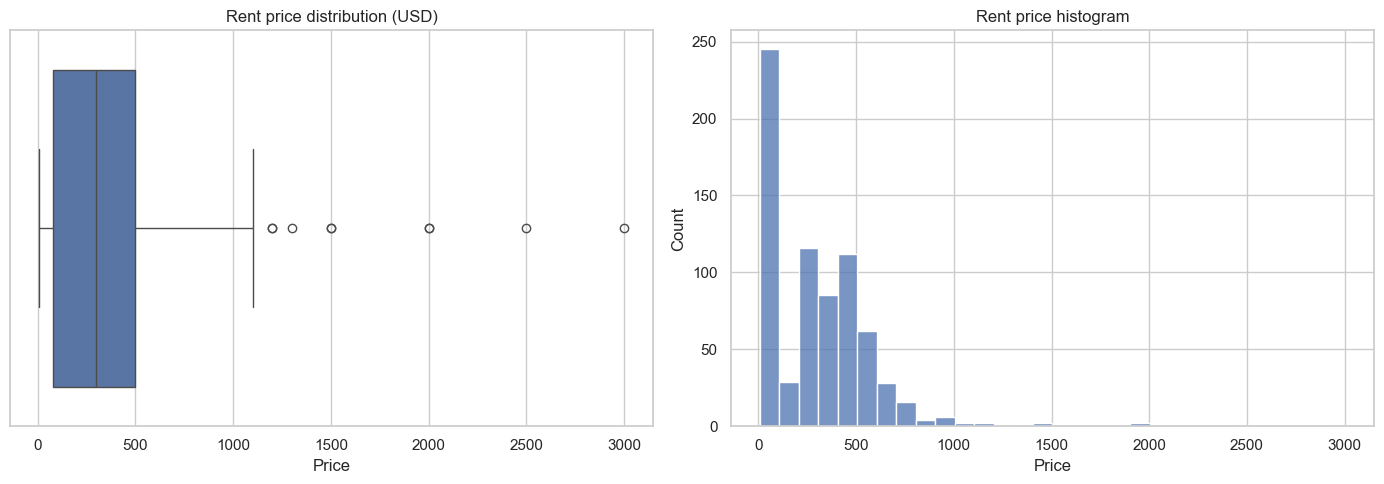

In [41]:
# Rent price distribution (shows spread and outliers in USD)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=olx_clean, x='Price', ax=axes[0])  # highlights median and potential high-rent outliers
axes[0].set_title('Rent price distribution (USD)')
sns.histplot(olx_clean['Price'], bins=30, ax=axes[1])  # frequency view to see skew
axes[1].set_title('Rent price histogram')
plt.tight_layout()


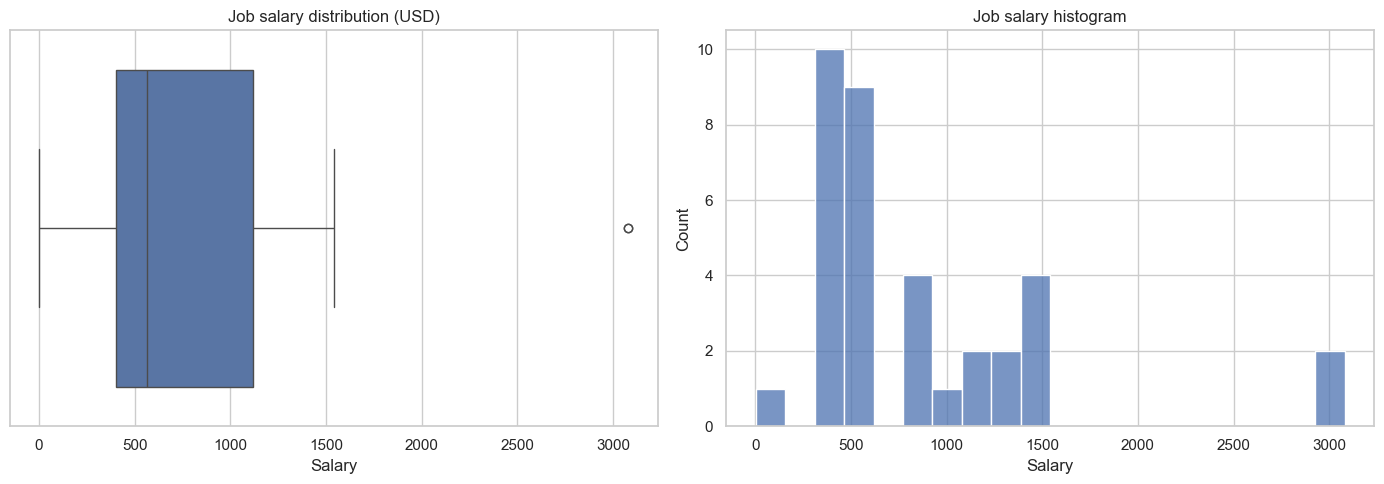

In [42]:
# Salary distribution (USD after tax) to see typical offers and outliers
hh_salary = hh_clean.dropna(subset=['Salary'])
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=hh_salary, x='Salary', ax=axes[0])  # median/whiskers show typical salary range
axes[0].set_title('Job salary distribution (USD)')
sns.histplot(hh_salary['Salary'], bins=20, ax=axes[1])  # histogram to assess skew and gaps
axes[1].set_title('Job salary histogram')
plt.tight_layout()


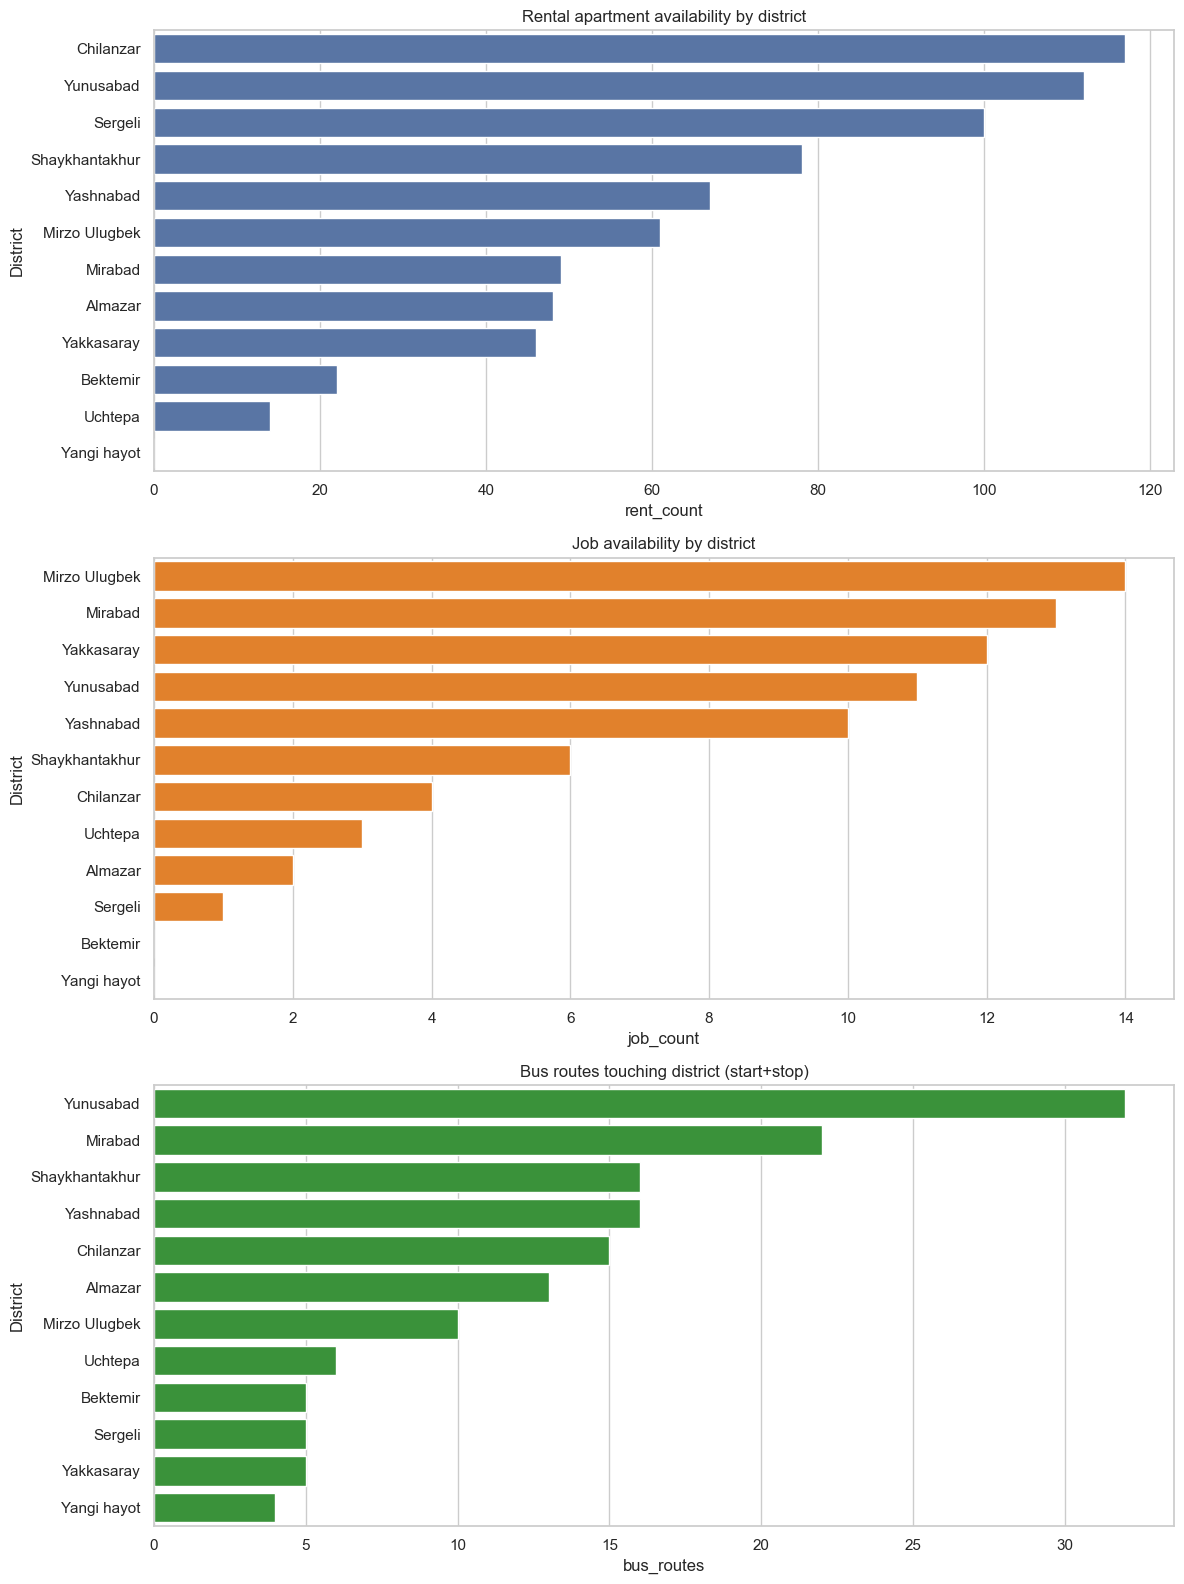

In [43]:
# Availability comparison: rentals, jobs, and bus routes per district
avail = district_summary.reset_index().fillna(0)
fig, axes = plt.subplots(3, 1, figsize=(12, 16))
sns.barplot(data=avail.sort_values('rent_count', ascending=False), x='rent_count', y='District', ax=axes[0])  # districts with most rental listings
axes[0].set_title('Rental apartment availability by district')
sns.barplot(data=avail.sort_values('job_count', ascending=False), x='job_count', y='District', ax=axes[1], color='tab:orange')  # where jobs concentrate
axes[1].set_title('Job availability by district')
sns.barplot(data=avail.sort_values('bus_routes', ascending=False), x='bus_routes', y='District', ax=axes[2], color='tab:green')  # bus reach shows transport access
axes[2].set_title('Bus routes touching district (start+stop)')
plt.tight_layout()


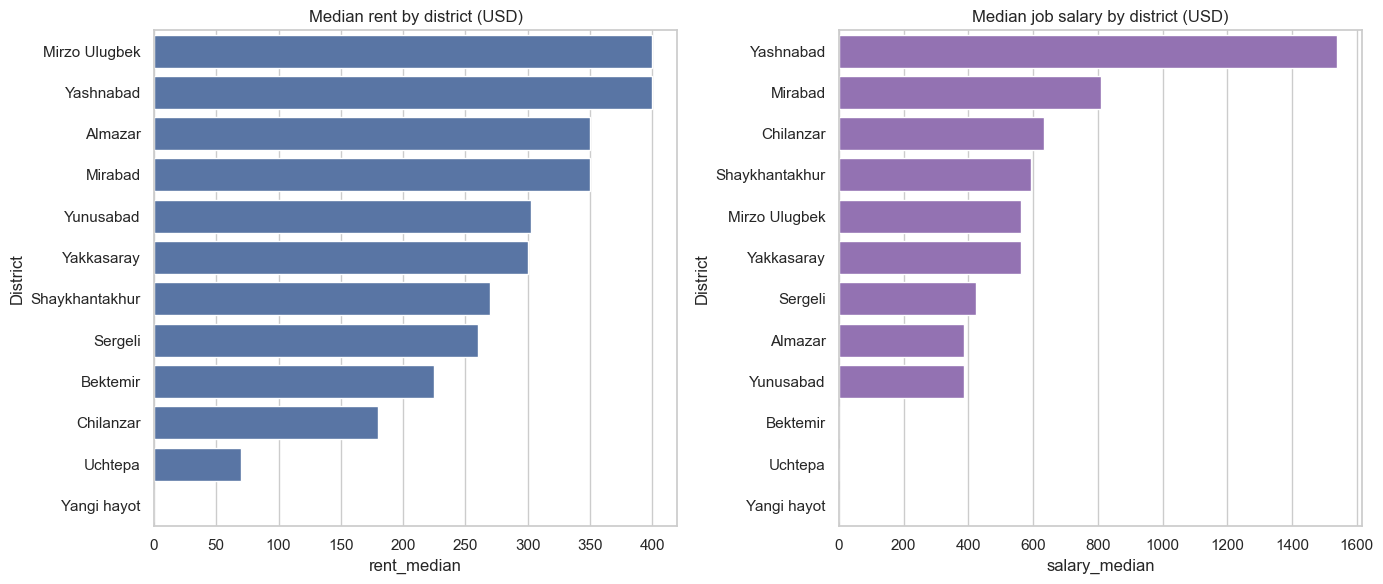

In [44]:
# Median rent vs median salary by district to compare affordability
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(data=avail.sort_values('rent_median', ascending=False), x='rent_median', y='District', ax=axes[0])  # where housing is pricier
axes[0].set_title('Median rent by district (USD)')
sns.barplot(data=avail.sort_values('salary_median', ascending=False), x='salary_median', y='District', ax=axes[1], color='tab:purple')  # where salaries are higher
axes[1].set_title('Median job salary by district (USD)')
plt.tight_layout()


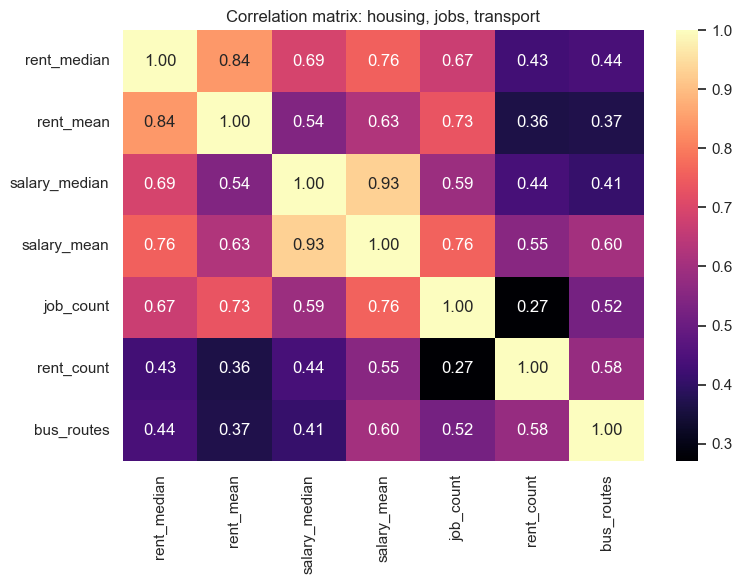

In [45]:
# Correlation matrix to see relationships among housing, jobs, and transport metrics
metrics = avail[['rent_median', 'rent_mean', 'salary_median', 'salary_mean', 'job_count', 'rent_count', 'bus_routes']]
corr = metrics.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='magma', fmt='.2f')  # highlights positive/negative associations
plt.title('Correlation matrix: housing, jobs, transport')
plt.tight_layout()


### Composite district ranking across housing, jobs, and transport

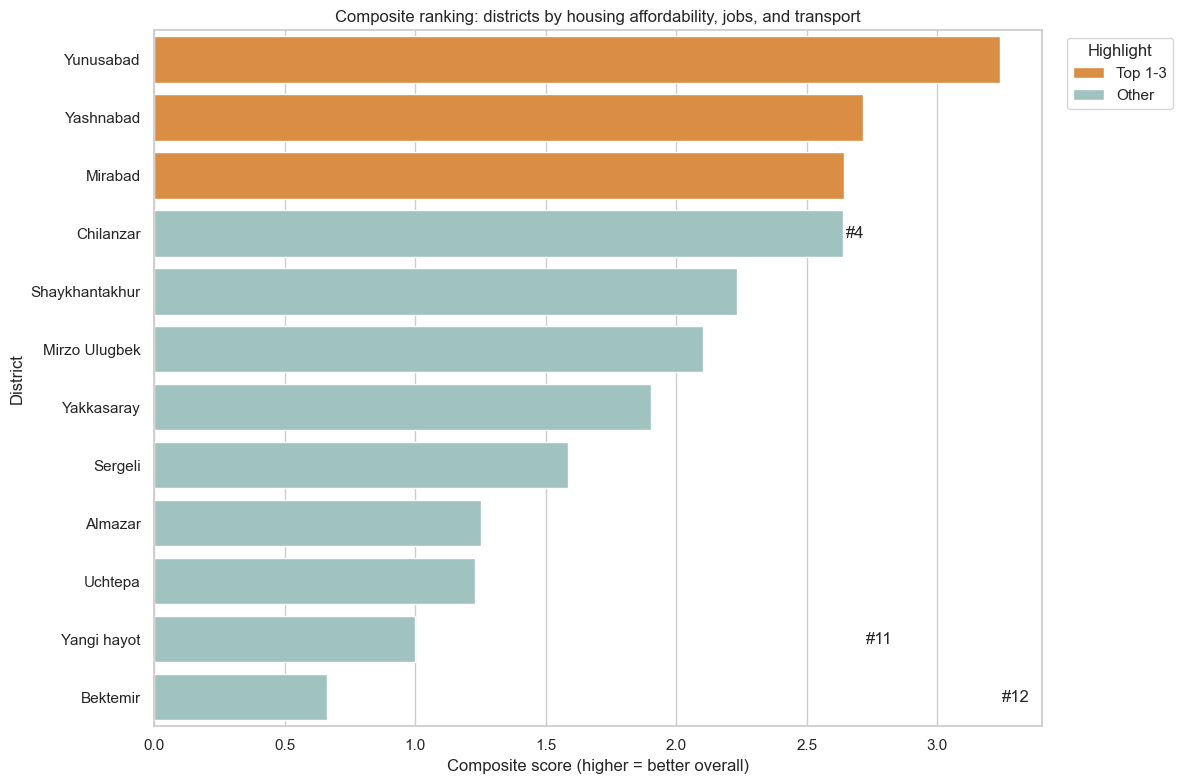

In [46]:
# Composite score: higher job_count/rent_count/salary_median/bus_routes are better, lower rent_median is better
rank_df = avail.copy()
# Replace NaNs with 0 for counts and medians to avoid drop
rank_df[['rent_median','salary_median','job_count','rent_count','bus_routes']] = rank_df[['rent_median','salary_median','job_count','rent_count','bus_routes']].fillna(0)

# Normalize metrics to 0-1. For rent_median, lower is better so invert after scaling.
def min_max(series, invert=False):
    s = series.astype(float)
    rng = s.max() - s.min()
    if rng == 0:
        scaled = 0.5 * pd.Series([1]*len(s), index=s.index)
    else:
        scaled = (s - s.min()) / rng
    return 1 - scaled if invert else scaled

rank_df['score'] = (
    min_max(rank_df['job_count']) +
    min_max(rank_df['rent_count']) +
    min_max(rank_df['bus_routes']) +
    min_max(rank_df['salary_median']) +
    min_max(rank_df['rent_median'], invert=True)
)

rank_df = rank_df.sort_values('score', ascending=False)

# Highlight top 3 districts in the bar plot
rank_df['highlight'] = ['Top 1-3' if i < 3 else 'Other' for i in range(len(rank_df))]

plt.figure(figsize=(12, 8))
sns.barplot(data=rank_df, x='score', y='District', hue='highlight', palette={'Top 1-3':'#f28e2b','Other':'#9ac9c4'})
plt.title('Composite ranking: districts by housing affordability, jobs, and transport')
plt.xlabel('Composite score (higher = better overall)')
plt.ylabel('District')
plt.legend(title='Highlight', bbox_to_anchor=(1.02, 1), loc='upper left')
for i, row in rank_df.head(3).iterrows():
    plt.text(row['score'] + 0.01, i, f"#{i+1}", va='center')
plt.tight_layout()
